In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from pandas import Series, DataFrame

In [3]:
log_path = "/data/log_data.csv"
log_df = pd.read_csv(log_path)

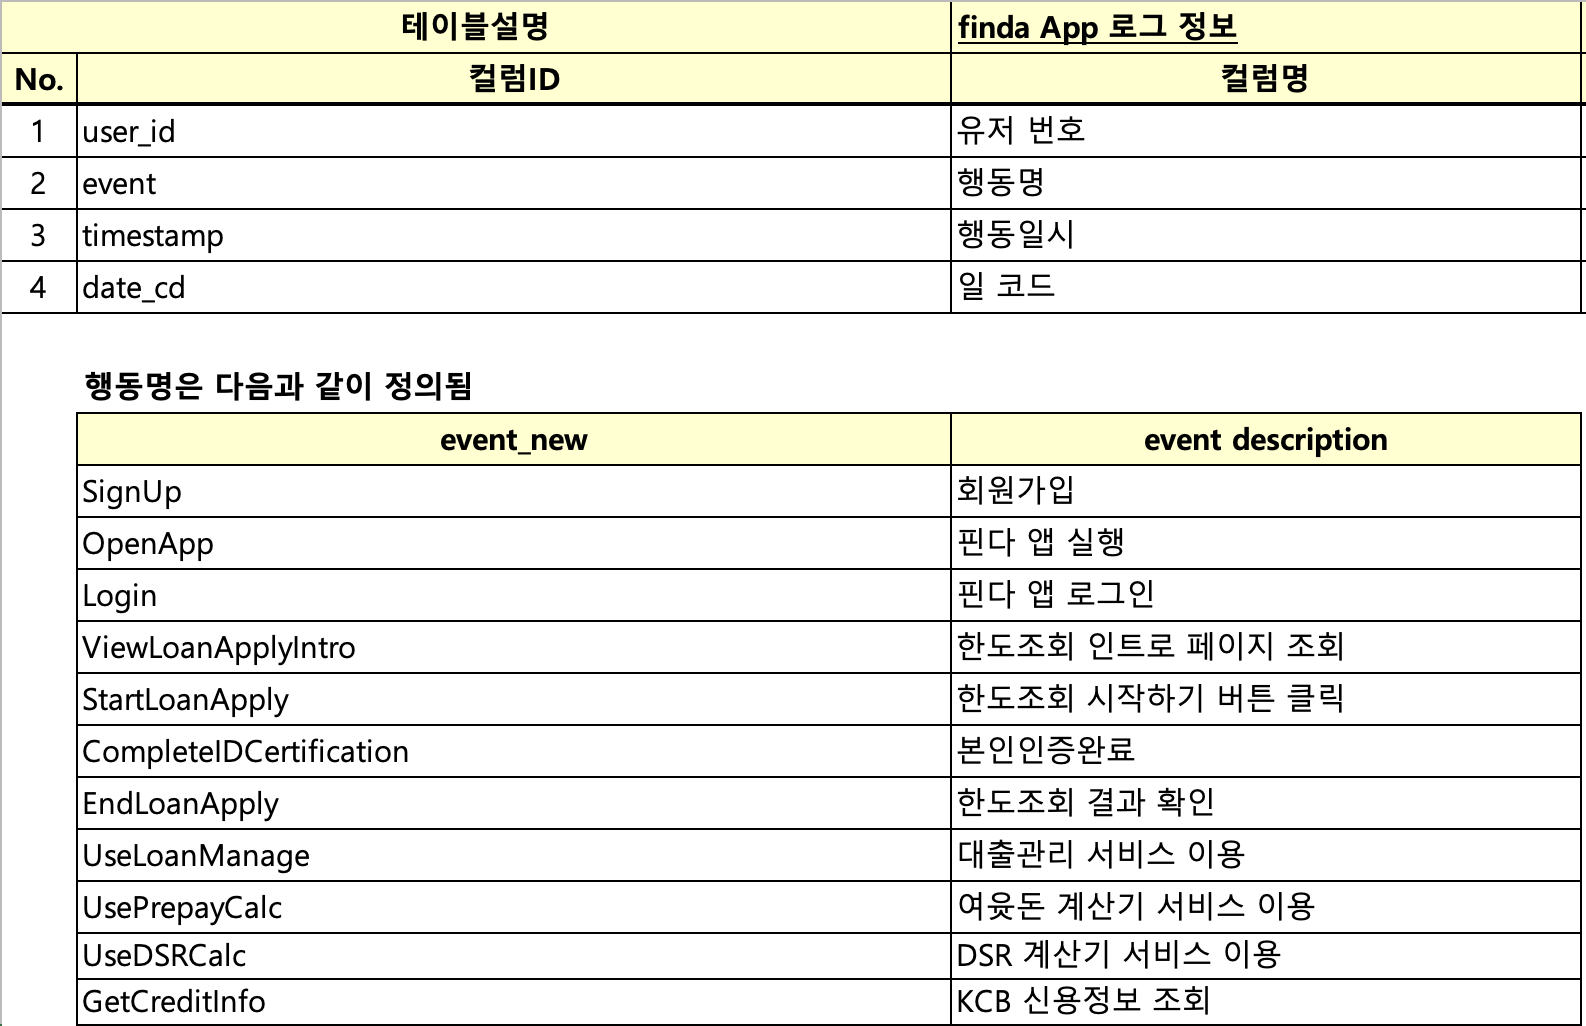

In [4]:
# 처음 5개 행 추출
log_df.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [5]:
# 테이블 정보
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


In [ ]:
# 테이블 형태
log_df.shape

In [6]:
# column별 null값의 개수
log_df.isnull().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

In [ ]:
# 테이블 통계량 요약
log_df.describe()

,user_id
count,1.784399e+07
mean,4.398264e+05
std,2.534944e+05
min,1.000000e+00
25%,2.212640e+05
50%,4.401280e+05
75%,6.588750e+05
max,8.796980e+05


#### [user_id] EDA

In [4]:
# user_id 종류 개수, type 출력
print(len(log_df.groupby('user_id').count()), log_df['user_id'].dtype)

584636 int64


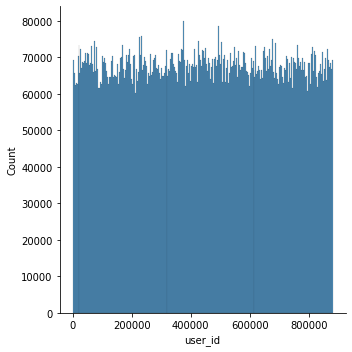

In [ ]:
sns.displot(log_df['user_id'])

#### [event] EDA

In [5]:
# event 종류 개수, type 출력
print(len(log_df.groupby('event').count()), log_df['event'].dtype)

11 object


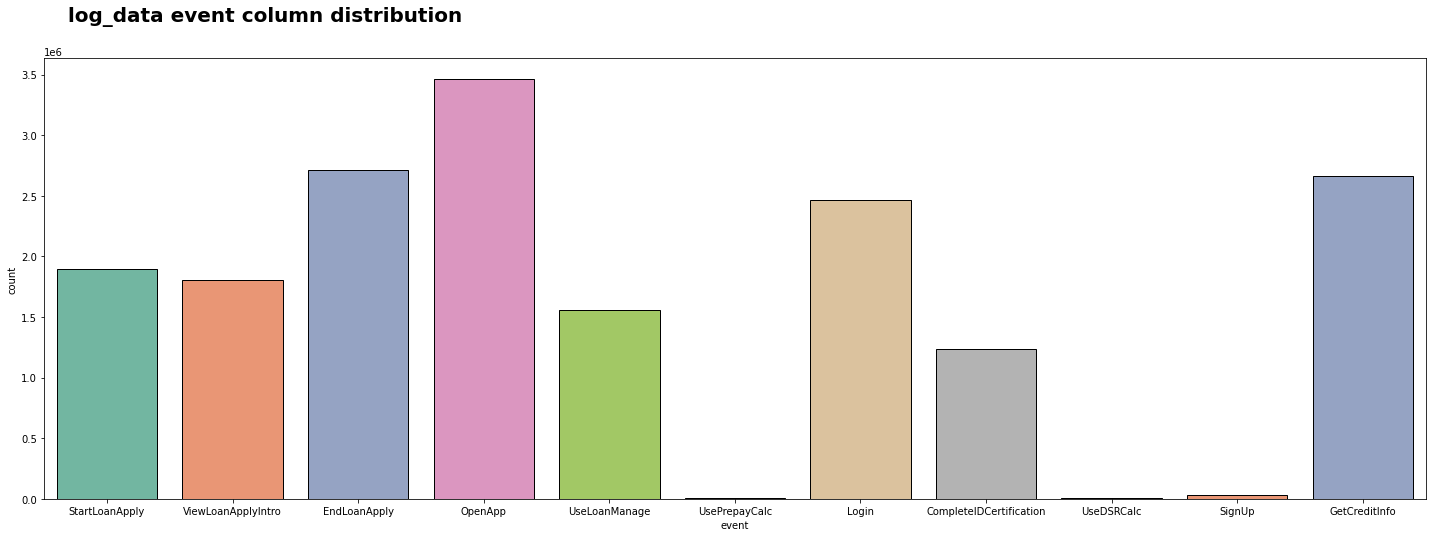

In [ ]:
# event 종류별 분포도

fig, axes = plt.subplots(1,1, figsize=(20, 7), sharey=True)

sns.countplot(x='event', data=log_df, palette="Set2", edgecolor='black')  
plt.suptitle('log_data event column distribution', 
             fontsize=20, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

#### [timestamp] EDA

In [6]:
# timestamp 종류 개수, type 출력
print(len(log_df.groupby('timestamp').count()), log_df['timestamp'].dtype)

122 object


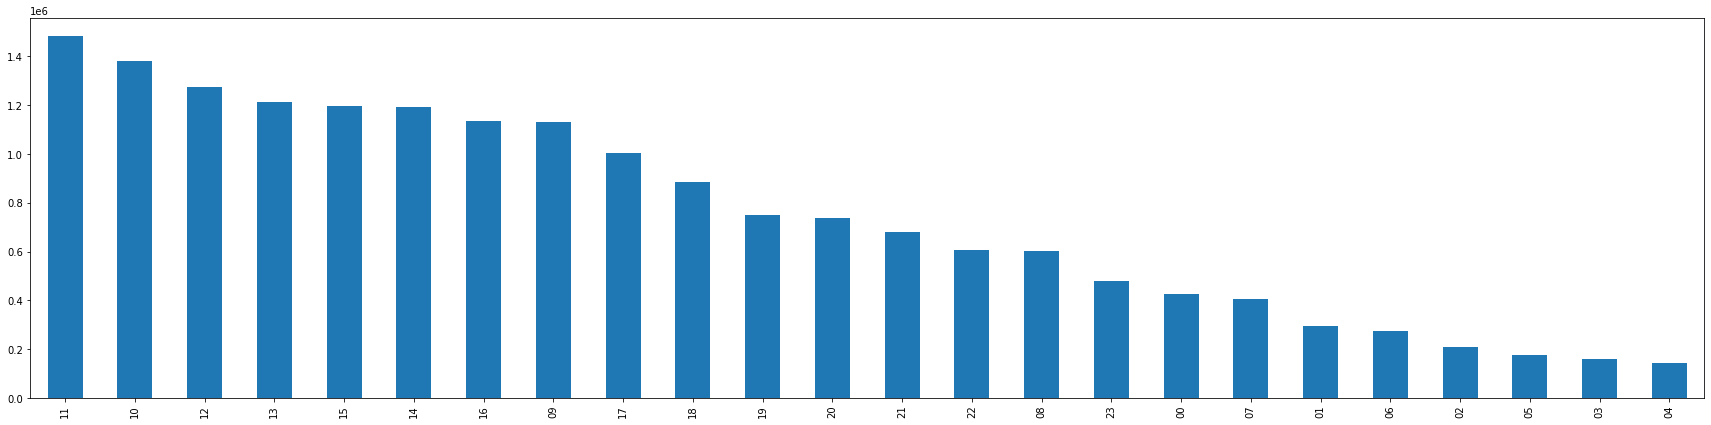

In [8]:
# 시간별 timestamp 분포도
time_df = log_df[log_df['timestamp'].isna() == False]['timestamp'].astype(str).apply(lambda x : x[11:13])
plt.figure(figsize=(30, 7))
time_df.value_counts().plot.bar()

#### [mp_os] EDA

In [ ]:
log_df.groupby('mp_os').count()

,user_id,event,timestamp,mp_app_version,date_cd
mp_os,,,,,
Android,12331688,12331688,12331688,12331685,12331688
android,2195434,2195434,2195434,2195434,2195434
iOS,3312862,3312862,3312862,2654184,3312862
iPadOS,3029,3029,3029,2093,3029


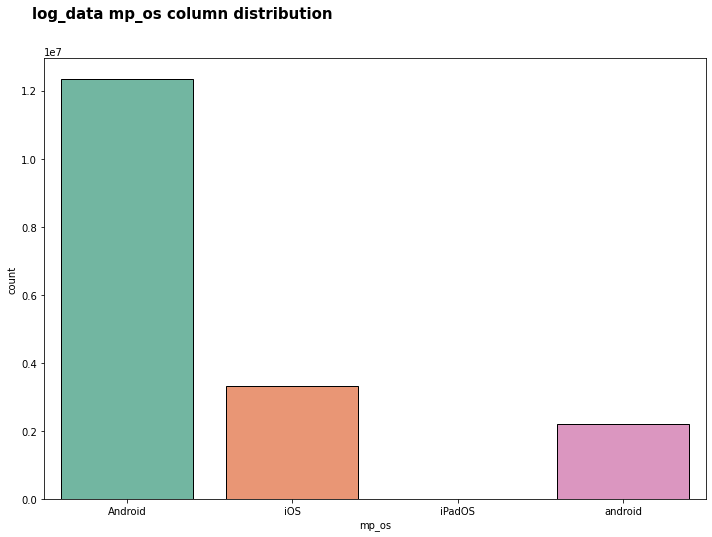

In [ ]:
# event 종류별 분포도

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='mp_os', data=log_df, palette="Set2", edgecolor='black')  
plt.suptitle('log_data mp_os column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

#### [mp_app_version] EDA

In [ ]:
# 앱 버전 종류 확인
log_df.groupby('mp_app_version').count()

,user_id,event,timestamp,mp_os,date_cd
mp_app_version,,,,,
100,2,2,2,2,2
10000,182,182,182,182,182
101,18,18,18,18,18
103,33,33,33,33,33
105,1,1,1,1,1
...,...,...,...,...,...
466,155208,155208,155208,155208,155208
467,133,133,133,133,133
468,13,13,13,13,13


#### [date_cd] EDA

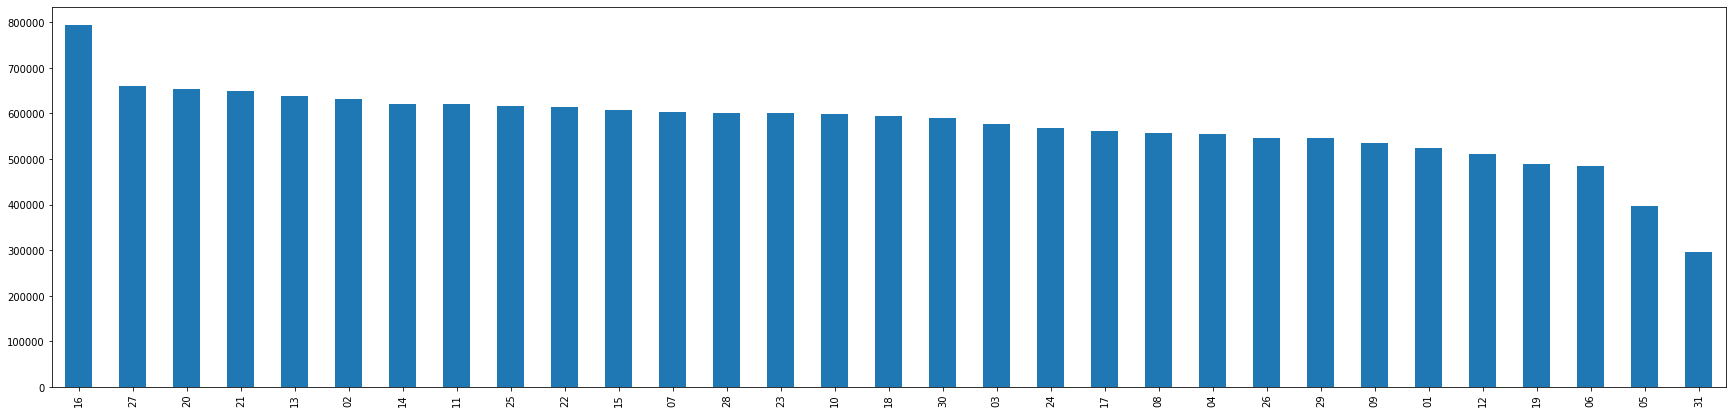

In [ ]:
# 일별 데이터 분포도
day_df = log_df[log_df['date_cd'].isna() == False]['date_cd'].astype(str).apply(lambda x : x[8:])
plt.figure(figsize=(30, 7))
day_df.value_counts().plot.bar()

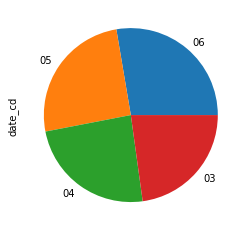

In [ ]:
# 월별 데이터 분포도
month_df = log_df[log_df['date_cd'].isna() == False]['date_cd'].astype(str).apply(lambda x : x[5:7])
month_df.value_counts().plot.pie()
